<a href="https://colab.research.google.com/github/zainamri/tugas/blob/main/customers2000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.mixture import GaussianMixture

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
# Load dataset
data = pd.read_csv('/content/drive/MyDrive/dataset/Customers.csv')


Mounted at /content/drive


In [3]:
# Menampilkan data teratas
data.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [4]:
# Menampilkan Info Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


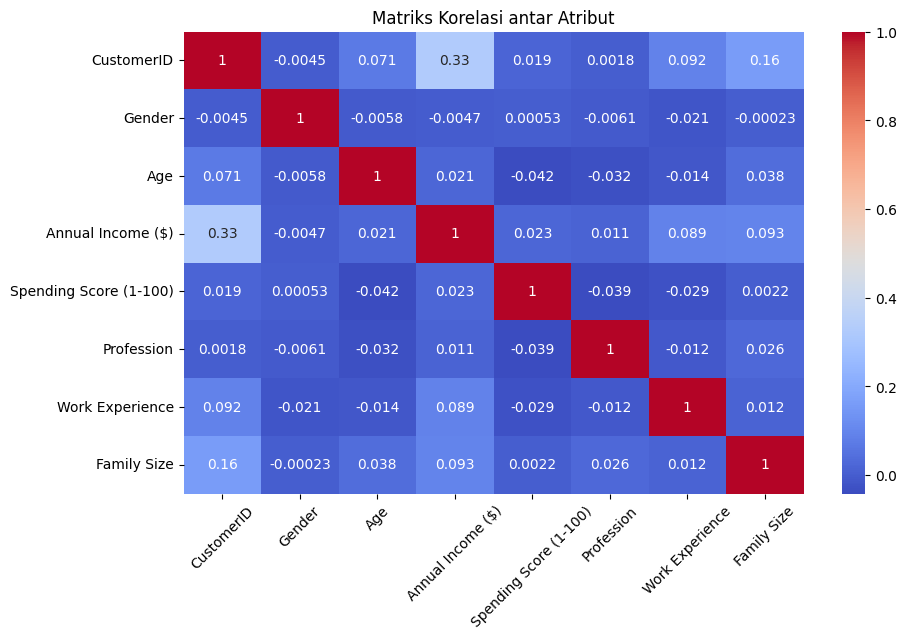

In [5]:
# Mengubah data kategorikal jadi numerik untuk analisis korelasi
data_encoded = data.copy()
data_encoded['Gender'] = data_encoded['Gender'].map({'Male': 0, 'Female': 1})
data_encoded['Profession'] = data_encoded['Profession'].astype('category').cat.codes

# Matriks korelasi
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi antar Atribut')
plt.xticks(rotation=45)
plt.show()


In [6]:
# Statistik deskriptif untuk kolom numerik
data.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


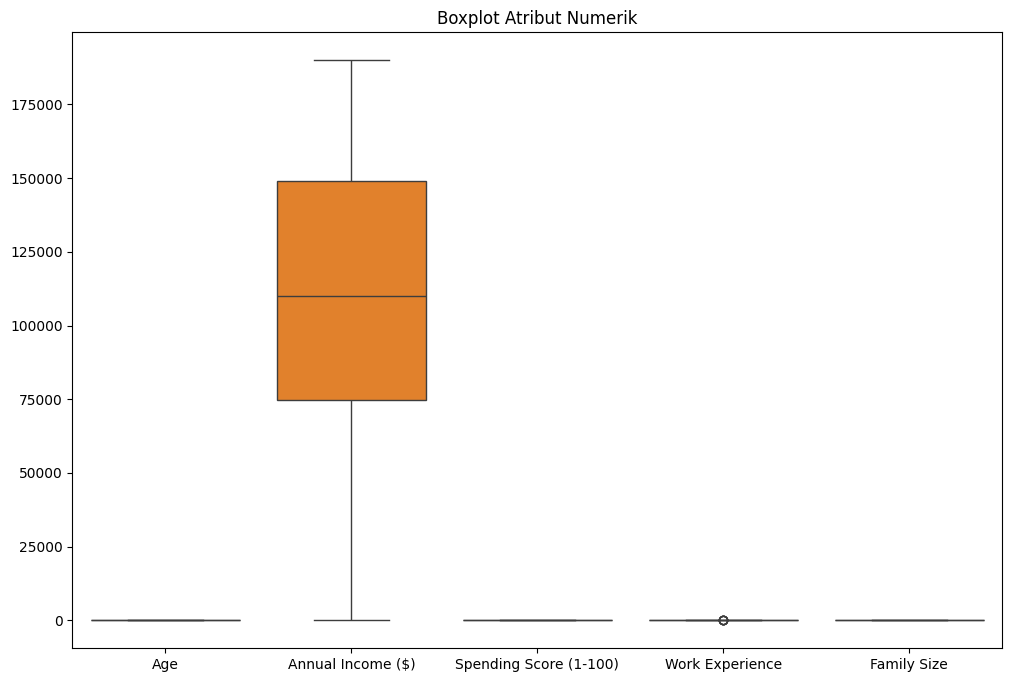

In [7]:
# Visualisasi boxplot untuk mendeteksi outlier
plt.figure(figsize=(12,8))
sns.boxplot(data=data_encoded[['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size']])
plt.title('Boxplot Atribut Numerik')
plt.show()

In [8]:
# Periksa nilai kosong
nilai_kosong = data.isnull().sum().sum()
print("Nilai Kosong:")
if nilai_kosong == 0:
    print("Tidak ada nilai kosong")
else:
    print(f"Terjadi {nilai_kosong} nilai kosong")

# Periksa nilai duplikat
jumlah_duplikat = data.duplicated().sum()
print("\nNilai Duplikat:")
if jumlah_duplikat == 0:
    print("Tidak ada duplikat")
else:
    print(f"Terjadi {jumlah_duplikat} duplikat")


Nilai Kosong:
Terjadi 35 nilai kosong

Nilai Duplikat:
Tidak ada duplikat


In [9]:
# Cek nilai unik di kolom kategorikal
print("Gender:", data['Gender'].unique())
print("Profession:", data['Profession'].unique())

Gender: ['Male' 'Female']
Profession: ['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing' nan]


In [10]:
# Seleksi kolom yang relevan
selected_cols = ['Age', 'Annual Income ($)', 'Spending Score (1-100)']
data_cleaned = data[selected_cols].dropna()

# Cek ukuran data
print("Jumlah baris dan kolom setelah seleksi:", data_cleaned.shape)



Jumlah baris dan kolom setelah seleksi: (2000, 3)


In [11]:
# Normalisasi dengan Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_cleaned)
data_scaled_df = pd.DataFrame(data_scaled, columns=selected_cols)

In [12]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4, random_state=42)
clusters_gmm = gmm.fit_predict(data_scaled_df)

# Tambahkan hasil klaster ke dataframe
data_scaled_df['GMM_Cluster'] = clusters_gmm

In [13]:
# Statistik label cluster
data_scaled_df['GMM_Cluster'].value_counts()

,count
GMM_Cluster,
3,544
2,512
0,495
1,449


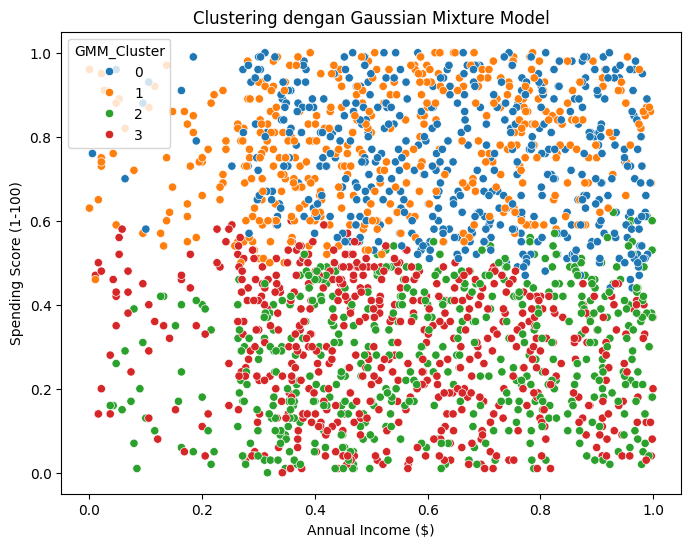

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=data_scaled_df,
    x='Annual Income ($)',
    y='Spending Score (1-100)',
    hue='GMM_Cluster',
    palette='tab10'
)
plt.title('Clustering dengan Gaussian Mixture Model')
plt.show()

In [15]:
# Gabungkan cluster dengan data asli
data_gmm = data_cleaned.copy()
data_gmm['GMM_Cluster'] = clusters_gmm

# Lihat ringkasan karakteristik tiap cluster
data_gmm.groupby('GMM_Cluster').mean()

,Age,Annual Income ($),Spending Score (1-100)
GMM_Cluster,,,
0,72.131313,124797.171717,74.260606
1,21.743875,99801.378619,77.498886
2,25.218750,114938.722656,27.728516
3,72.683824,102995.584559,29.727941
